### PCA - the easy way

In [2]:
from sklearn.decomposition import PCA 

In [3]:
my_pca = PCA(n_components=2)

In [ ]:
new_projected_data = my_pca.fit_transform(...) # <- to insert the name of the data 

### PCA - from scratch

1. standardize the data
2. get the eigenvectors and eigenvalues from the covariance OR the correlation matrix (or perform the Singular Value Decomposition of the data) 
3. sort the eigenvalues (descending) and get the k eigenvectors related to the k biggest eigenvalues 
4. project the original data on the new space "created" by the set of selected eigenvectors 

In [5]:
import pandas as pd 
import seaborn as sns

In [6]:
iris = sns.load_dataset("iris")

In [7]:
type(iris)

pandas.core.frame.DataFrame

In [8]:
### dropping missing values 
iris.dropna(how = "all", inplace=True)

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Storing only the numerical variables 
X = iris.iloc[:, 0:4]

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 1 - Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler().fit_transform(X)

#### 2 - getting eigenvalues and eigenvectors 

In [13]:
import numpy as np 

In [14]:
mean_vector = np.mean(X_s, axis = 0)

In [15]:
N = X_s.shape[0]

In [16]:
covariance_matrix = (X_s - mean_vector).T.dot( (X_s - mean_vector) ) / (N - 1) #unbiased est.

In [17]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [18]:
### numpy direct approach 
np.cov(X_s.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [19]:
# extract eigen...
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [20]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [21]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

From Correlation matrix

In [25]:
correlation_matrix = np.corrcoef(X_s.T)

In [26]:
pd.DataFrame(correlation_matrix)

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [27]:
eigen_values_corr, eigen_vectors_corr = np.linalg.eig(correlation_matrix)

In [28]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [29]:
eigen_vectors_corr

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [30]:
# np.linalg.svd -> returns three objects, we need the first one 
u, s, v = np.linalg.svd(X_s.T)

In [31]:
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

#### Choosing the number of components

In [33]:
# ratio of explained variance (using the eigenvalues)

tot_eig_vals = sum(eigen_values)
tot_eig_vals

4.026845637583893

In [36]:
sorted_eigenvalues = sorted(eigen_values, reverse=True)

In [37]:
variance_explained = [ (i / tot_eig_vals)*100 for i in sorted_eigenvalues ]

In [38]:
variance_explained

[72.96244541329987, 22.85076178670176, 3.6689218892828763, 0.5178709107154735]

In [39]:
np.cumsum(variance_explained)

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

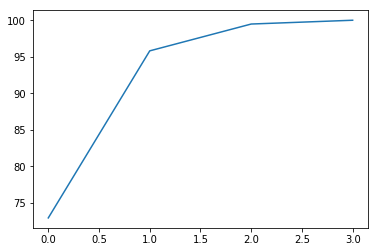

In [46]:
plt.plot(np.cumsum(variance_explained))

### 4) Projecting the original data on the new space 

In [52]:
# Sorting the eigenvectors accordingly to the eigenvalues 
eigen_vectors_values = [ ( np.abs(eigen_values[i]), eigen_vectors[:, i] ) 
                        for i in range(len(eigen_values)) ]

In [53]:
eigen_vectors_values

[(2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624871,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494807,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462023,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [59]:
eigen_vectors_values.sort()

In [60]:
eigen_vectors_values

[(0.020853862176462023,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713])),
 (0.14774182104494807,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.9201649041624871,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))]

In [61]:
eigen_vectors_values.reverse()

In [62]:
eigen_vectors_values

[(2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624871,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494807,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462023,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [68]:
eigen_vectors_values[0][1].reshape(4, -1)

array([[ 0.52106591],
       [-0.26934744],
       [ 0.5804131 ],
       [ 0.56485654]])

In [74]:
## Creating the top-2 eigenvectors matrix (4 x 2)
top2_eigenvectors = np.hstack( ( eigen_vectors_values[0][1].reshape(4, -1), 
                             eigen_vectors_values[1][1].reshape(4, -1) ) )

In [75]:
top2_eigenvectors

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

Y = X * P (to get Y, the new observations) 

In [76]:
type(X_s)

numpy.ndarray

In [77]:
Y = X_s.dot(top2_eigenvectors)

### Plotting the results 

In [81]:
import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go 

In [82]:
# TODO: plot the observation on the 2-dim space given by Y, with a different colour 
# for each species: we should get 3 completely separated groups